In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate,cross_val_predict,GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('online_gaming_behavior_dataset.csv')
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
data.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [5]:
data.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [6]:
data = data.drop('PlayerID', axis=1)
data.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [7]:
data['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
print(X['Gender'].nunique())
print(X['GameGenre'].nunique())
print(X['GameDifficulty'].nunique())
print(X['Location'].nunique())

2
5
3
4


In [10]:
cat_col = X.select_dtypes(include='object')
for col in cat_col:
    le  = LabelEncoder()
    X[col] = le.fit_transform(X[col])

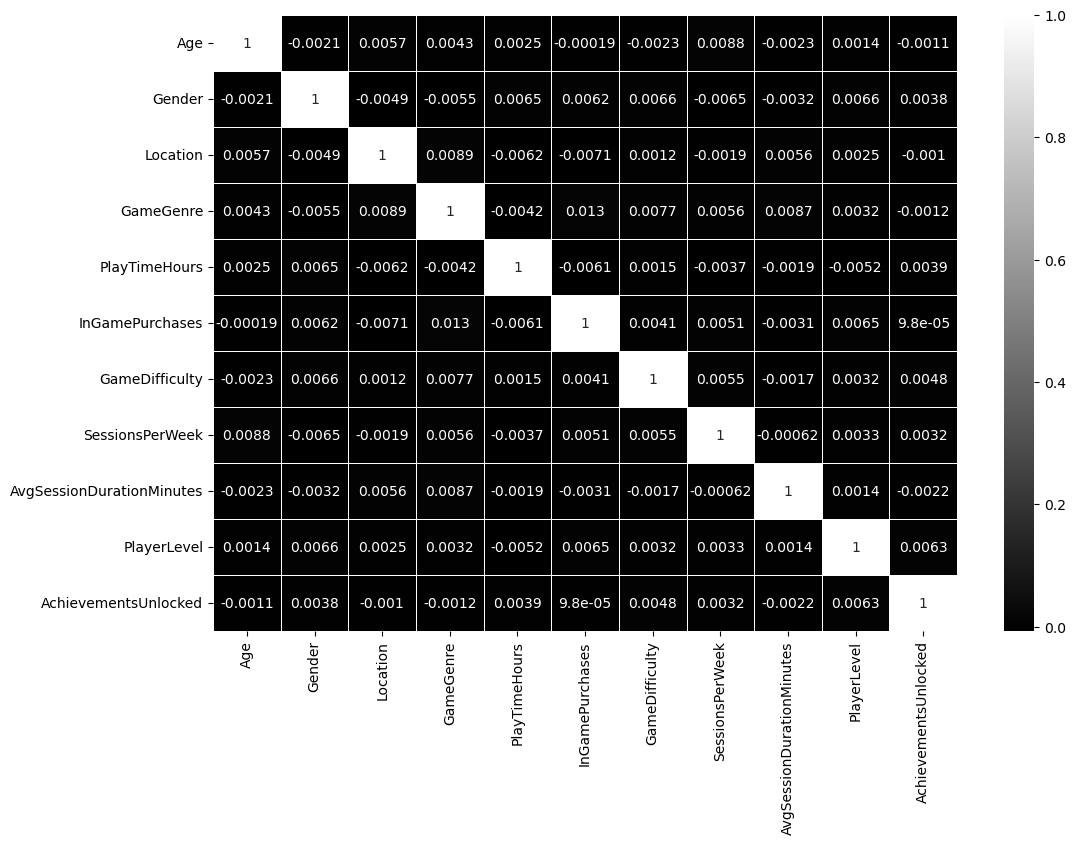

In [11]:
plt.figure(figsize=(12,8))
corr_mat = X.corr()
sns.heatmap(corr_mat, annot=True, cmap='grey', linewidths=0.5)
plt.show()

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=25)

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
models = [GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(max_depth=3),RandomForestClassifier(max_depth=13, n_estimators=100 )]

In [63]:
def model_func(model, X_train_sc, X_test_sc, y_train,y_test):
    print(f"results for {model}")
    print('-------------------------------------------')
    model.fit(X_train_sc,y_train)
    y_pred = model.predict(X_test_sc)
    y_pred_prob = model.predict_proba(X_test_sc)
    class_order = model.classes_
    print(f'class order {class_order}')
    result_data = pd.DataFrame({
        "actual label ": y_test,
        "Predicted label": y_pred
    })
    for i, class_name in enumerate(class_order):
        result_data[f"Probability of {class_name}"]=np.round(y_pred_prob[:,i],2)
    training_accuracy = accuracy_score(y_train,model.predict(X_train_sc))
    testing_accuracy = accuracy_score(y_test,y_pred)
    print(f"Training Accuracy: {training_accuracy}")
    print(f"Testing Accuracy: {testing_accuracy}")
    conf_mat = confusion_matrix(y_test,y_pred)
    cm_display =  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = class_order )
    cm_display.plot(colorbar= False)
    plt.show()
    class_report =  classification_report(y_test, y_pred)
    print(class_report)
    #roc Curve
    if len(set(y_test)) > 1:
        # Binarize y_test for multi-class classification
        y_test_binarize = label_binarize(y_test, classes=class_order)
        n_classes = y_test_binarize.shape[1]
        fpr = {}
        tpr = {}
        roc_auc = {}
        # Compute ROC curve and ROC area for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_pred_prob[:, i])
            roc_auc[i] = roc_auc_score(y_test_binarize[:, i], y_pred_prob[:, i])
        
        # Plot the ROC curves for each class
        plt.figure()
        colours = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, colour in zip(range(n_classes), colours):
            plt.plot(fpr[i], tpr[i], color=colour, lw=2, label=f"ROC curve for class {i} (Area = {roc_auc[i]:.3f})")
        # Plot diagonal line for random guessing
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.1])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve of {model}")
        plt.legend(loc="lower right")
        plt.show()    
    else:
        print(f"ROC curve is not possible for this {model}")


results for GaussianNB()
-------------------------------------------
class order ['High' 'Low' 'Medium']
Training Accuracy: 0.8411661849195304
Testing Accuracy: 0.8423112147198402


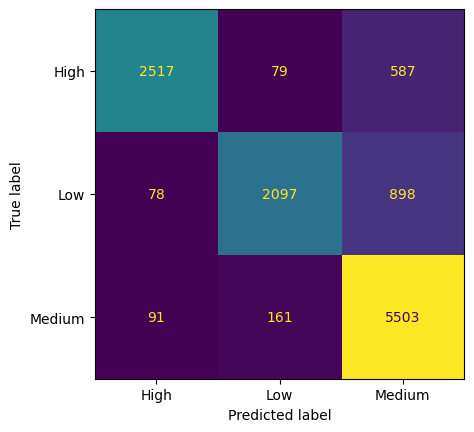

              precision    recall  f1-score   support

        High       0.94      0.79      0.86      3183
         Low       0.90      0.68      0.78      3073
      Medium       0.79      0.96      0.86      5755

    accuracy                           0.84     12011
   macro avg       0.87      0.81      0.83     12011
weighted avg       0.86      0.84      0.84     12011



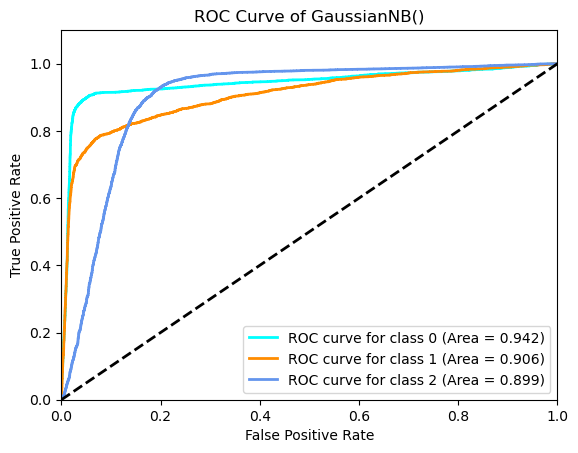

None
results for KNeighborsClassifier()
-------------------------------------------
class order ['High' 'Low' 'Medium']
Training Accuracy: 0.8439496128180424
Testing Accuracy: 0.7586379152443593


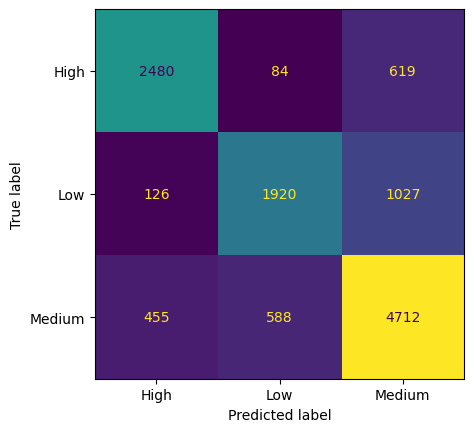

              precision    recall  f1-score   support

        High       0.81      0.78      0.79      3183
         Low       0.74      0.62      0.68      3073
      Medium       0.74      0.82      0.78      5755

    accuracy                           0.76     12011
   macro avg       0.76      0.74      0.75     12011
weighted avg       0.76      0.76      0.76     12011



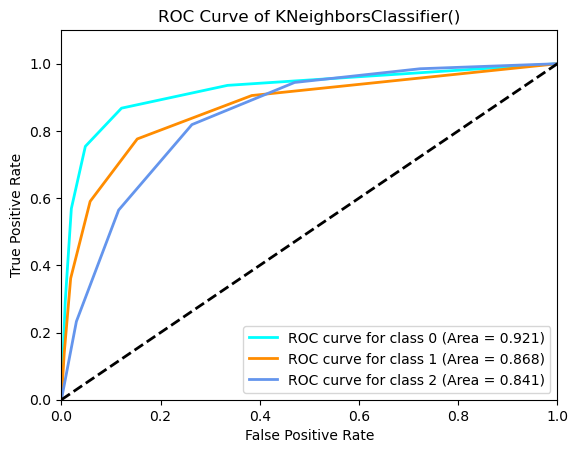

None
results for DecisionTreeClassifier(max_depth=3)
-------------------------------------------
class order ['High' 'Low' 'Medium']
Training Accuracy: 0.8006637404988759
Testing Accuracy: 0.8017650487053535


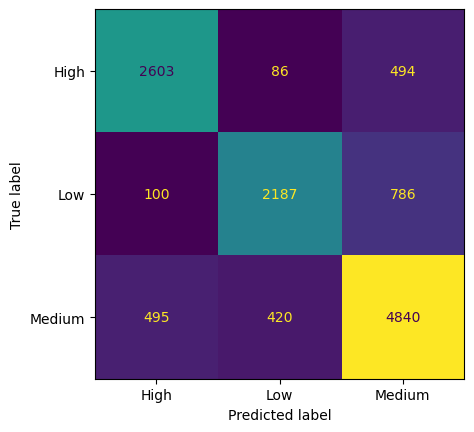

              precision    recall  f1-score   support

        High       0.81      0.82      0.82      3183
         Low       0.81      0.71      0.76      3073
      Medium       0.79      0.84      0.82      5755

    accuracy                           0.80     12011
   macro avg       0.81      0.79      0.80     12011
weighted avg       0.80      0.80      0.80     12011



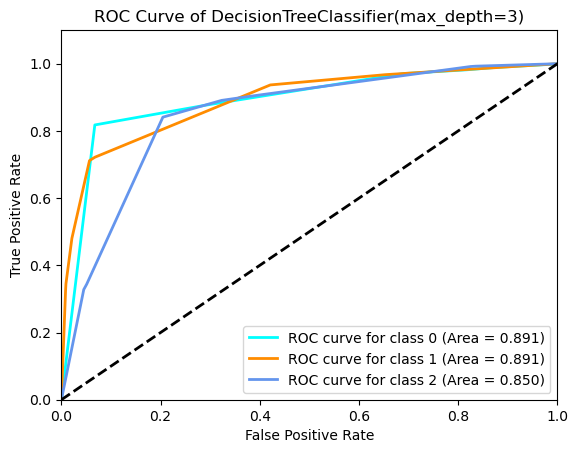

None
results for RandomForestClassifier(max_depth=13)
-------------------------------------------
class order ['High' 'Low' 'Medium']
Training Accuracy: 0.9411197944545552
Testing Accuracy: 0.9043376904504205


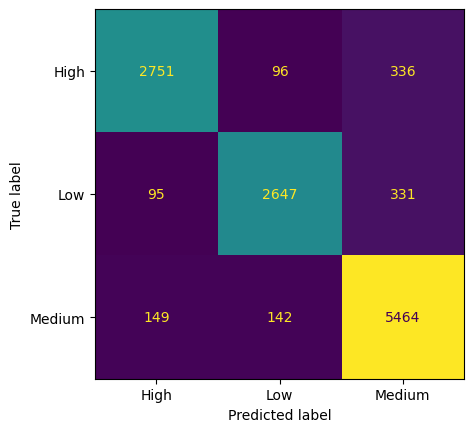

              precision    recall  f1-score   support

        High       0.92      0.86      0.89      3183
         Low       0.92      0.86      0.89      3073
      Medium       0.89      0.95      0.92      5755

    accuracy                           0.90     12011
   macro avg       0.91      0.89      0.90     12011
weighted avg       0.91      0.90      0.90     12011



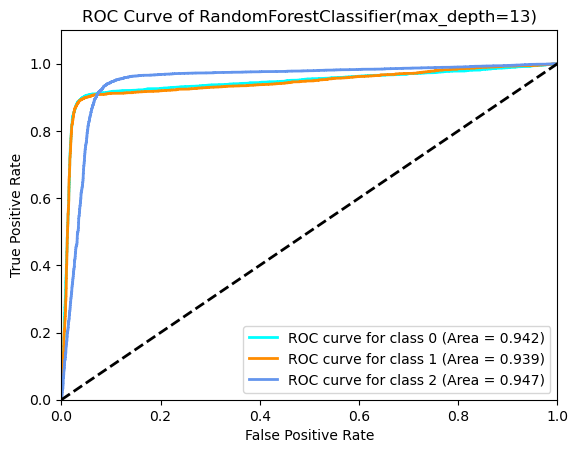

None


In [64]:
for model in models:
    print(model_func(model,X_train,X_test,y_train,y_test))